In [62]:
# Importing of required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

### Loading all .csv files

In [63]:
movies=pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [64]:
ratings=pd.read_csv("ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [65]:
tags=pd.read_csv("tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [66]:
links=pd.read_csv("links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


### How many unique "userId" are available in "ratings.csv"?

In [67]:
rating["userId"].nunique()

610

### Which movie has recieved maximum number of user ratings?


In [68]:
# Group by movieId and count the number of ratings for each movie
ratings_count = ratings.groupby('movieId')['rating'].count()

# Find the movieId with the maximum number of ratings
max_ratings_movieId = ratings_count.idxmax()

# Get the corresponding movie title from movies
max_ratings_movie_title = movies[movies['movieId'] == max_ratings_movieId]['title'].values[0]

print(f"The movie with the maximum number of ratings is: {max_ratings_movie_title}") 

The movie with the maximum number of ratings is: Forrest Gump (1994)


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [69]:
# First, find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter the tags for the specific movieId
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

# Get unique tags for the movie
unique_tags = matrix_tags['tag'].unique()

# Print the unique tags
print("Tags submitted by users to 'Matrix, The (1999)':")
print(unique_tags) 

Tags submitted by users to 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [70]:
# First, find the movieId for "Terminator 2: Judgment Day (1991)"
terminator2_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter the ratings for the specific movieId
terminator2_ratings = ratings[ratings['movieId'] == terminator2_movie_id]

# Calculate the average user rating
average_rating = terminator2_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}") 

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

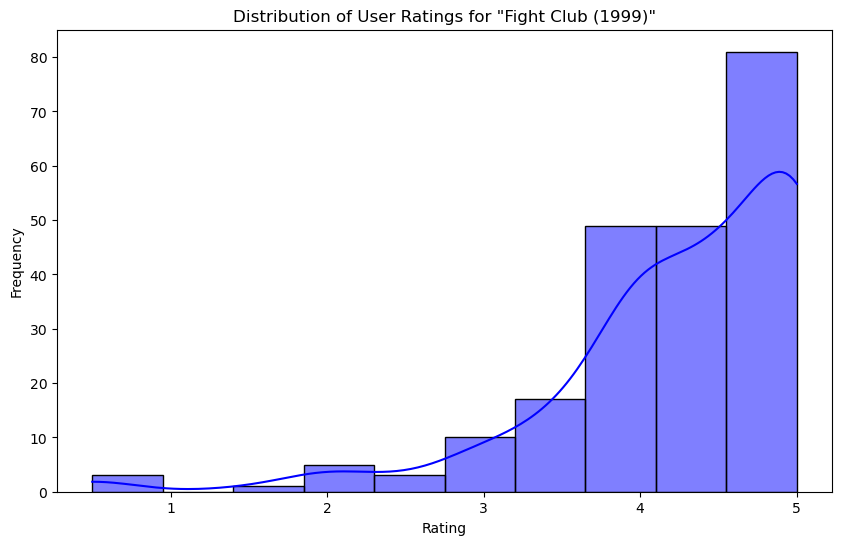

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter the ratings for the specific movieId
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]

# Plot a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show() 

### 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [72]:
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
# Renaming columns
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

merged_data = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

movies_greater_than_50_ratings = merged_data[merged_data['rating_count'] > 50]

movies_greater_than_50_ratings

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### Which movie is the most popular based on  average user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [73]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]

# Display the most popular movie
print(f"The most popular movie based on average user ratings is:")
most_popular_movie[['title', 'rating_mean']] 

The most popular movie based on average user ratings is:


title          Shawshank Redemption, The (1994)
rating_mean                            4.429022
Name: 277, dtype: object

### Select all the correct options which comes under top 5 popular movies based on number of user ratings.
*
Answer this question only after applying the above mentioned "Mandatory Operration

In [74]:
# Sort the DataFrame based on rating_count in descending order
top_5_popular_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on the number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [75]:
# Filter the DataFrame to include only Sci-Fi movies
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False)]

# Sort the Sci-Fi movies based on rating_count in descending order
sorted_scifi_movies = scifi_movies.sort_values(by='rating_count', ascending=False)

# Display the third most popular Sci-Fi movie
third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]

print("The third most popular Sci-Fi movie based on the number of user ratings is:")
third_most_popular_scifi_movie[['title', 'rating_count']] 

The third most popular Sci-Fi movie based on the number of user ratings is:


title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object

### 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.


### Scraping the IBMD movies

In [ ]:
movies_with_imdb_ids = pd.merge(movies_greater_than_50_ratings, links, on='movieId', how='inner')

all_reviews = []

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
reviews_data = []
for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    reviews_data.extend([(imdb_id, review) for review in movie_reviews])

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame(reviews_data, columns=['imdbId', 'Review_Text'])


In [ ]:
reviews_df

In [ ]:
reviews_df.to_csv('reviews_df.csv', index = False)

In [ ]:
reviews_df = pd.read_csv('movie_data/reviews_df.csv')
reviews_df.head()

### Mention the movieId of the movie which has the highest IMDB rating?

In [ ]:
merged_reviews_links = pd.merge(reviews_df, links_df, on='imdbId', how='inner')

merged_reviews_links_ratings = pd.merge(merged_reviews_links,movies_greater_than_50_ratings, on = 'movieId', how = 'inner')


merged_reviews_links_ratings.sort_values(by='rating_count', ascending=False)['movieId'].unique()[0]

### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating?.**

In [ ]:
# Filter the DataFrame to include only Sci-Fi movies
sci_fi_movies = merged_reviews_links_ratings[merged_reviews_links_ratings['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))]
sci_fi_movies.sort_values(by = 'rating_count', ascending= False)['movieId'].iloc[0]